In [1]:
import torch
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *

/home/rocky/environments/train_pytorch/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [38]:
n=6
d=784
I=np.eye(n)
A=get_xinmeng_matrix(n=n).T 
A=0.8*A+0.2*I
B=get_B(A=A,u=2*n,n=n)
epochs=600

最优参数

PullSum: lr=0.122/n*n=0.122

Training Progress: 100%|██████████| 600/600 [01:11<00:00,  8.39it/s, accuracy=97.7568740955%, epoch=600, loss=0.0600550901]


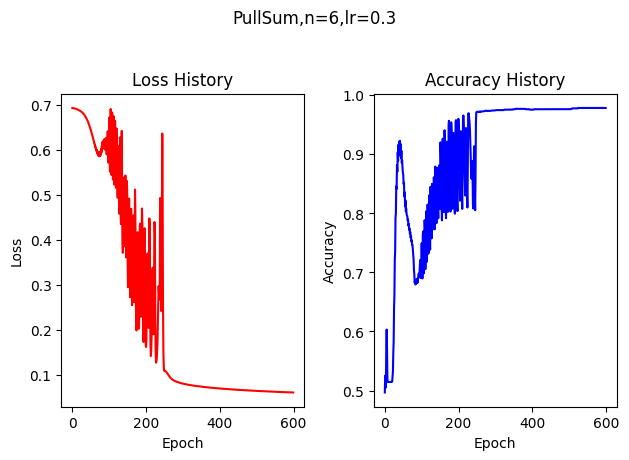

In [14]:
l,a=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.3/n)) 

Training Progress: 100%|██████████| 600/600 [01:12<00:00,  8.29it/s, accuracy=97.5397973951%, epoch=600, loss=0.0664506089]


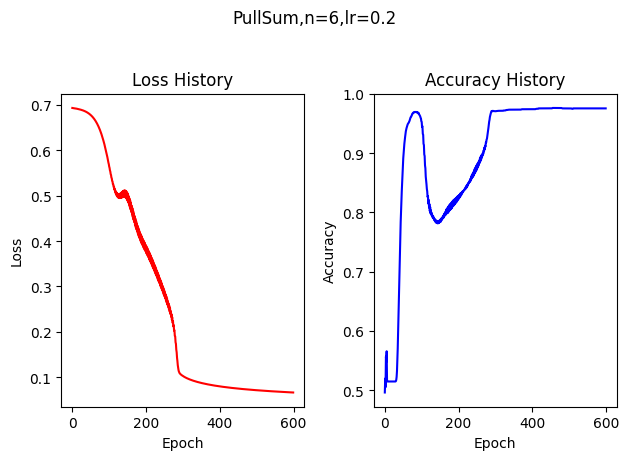

In [15]:
l,a=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.2/n)) 

Training Progress: 100%|██████████| 600/600 [01:11<00:00,  8.39it/s, accuracy=97.4674384949%, epoch=600, loss=0.0804118949]


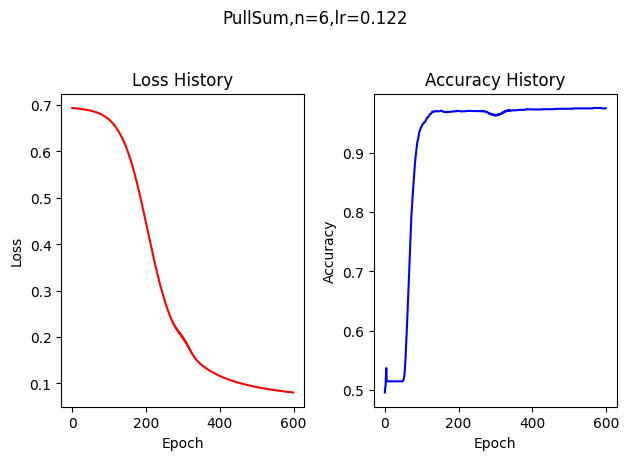

In [21]:
l,a=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.122/n)) 

Training Progress: 100%|██████████| 600/600 [01:12<00:00,  8.33it/s, accuracy=97.7568740955%, epoch=600, loss=0.0604947501]


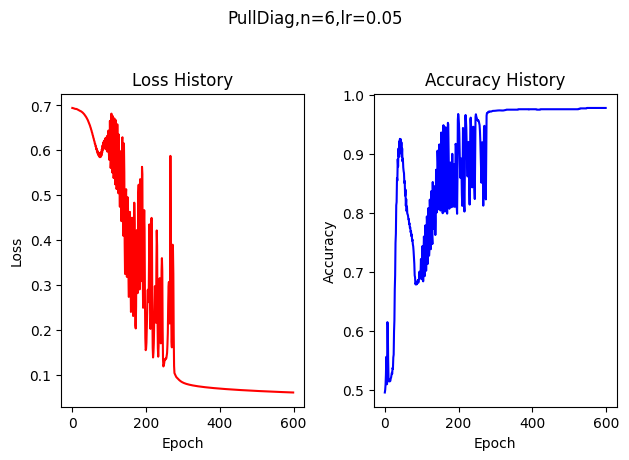

In [28]:
L,A=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=5e-2) 

Training Progress: 100%|██████████| 600/600 [01:12<00:00,  8.32it/s, accuracy=97.4674384949%, epoch=600, loss=0.0805508221]


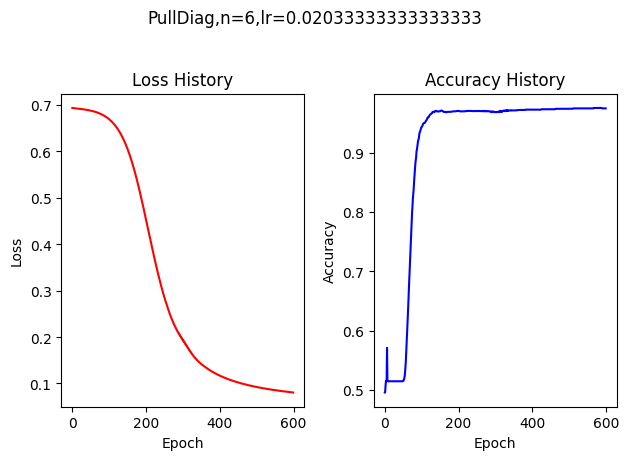

In [39]:
L,A=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.122/n)) 

Training Progress: 100%|██████████| 600/600 [01:13<00:00,  8.17it/s, accuracy=97.5397973951%, epoch=600, loss=0.0683368805]


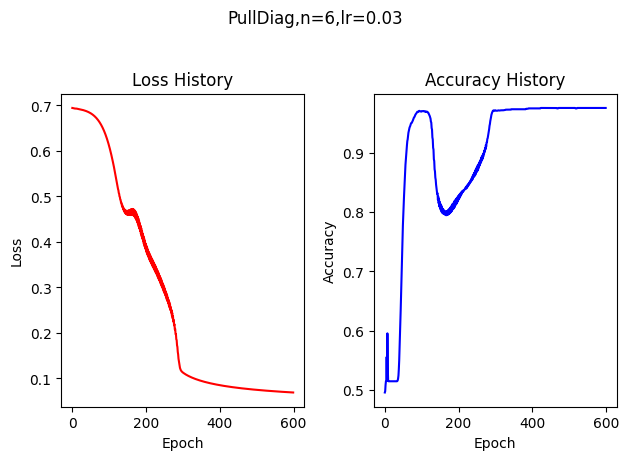

In [35]:
L,A=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=3e-2) 

Training Progress: 100%|██████████| 600/600 [01:11<00:00,  8.34it/s, accuracy=97.4674384949%, epoch=600, loss=0.0814518022]


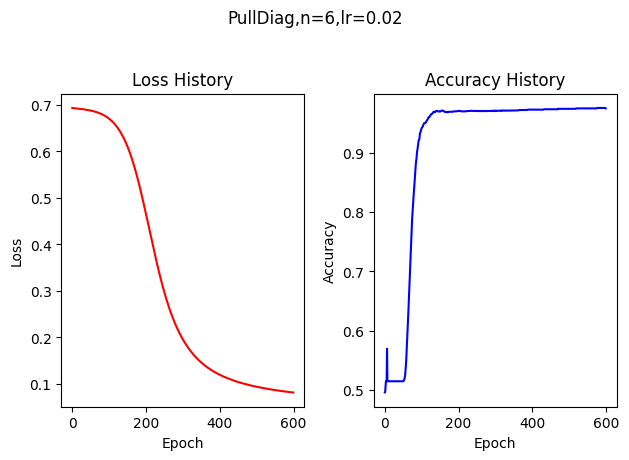

In [37]:
L,A=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=2e-2) 

1. PullSum可以耐受更大的学习率

In [59]:
n=6
d=784
I=np.eye(n)
A=get_xinmeng_matrix(n=n).T 
A=0.8*A+0.2*I
B=get_B(A=A,u=2*n,n=n)
epochs=600

Training Progress: 100%|██████████| 600/600 [01:15<00:00,  7.93it/s, accuracy=97.4674384949%, epoch=600, loss=0.0804118949]


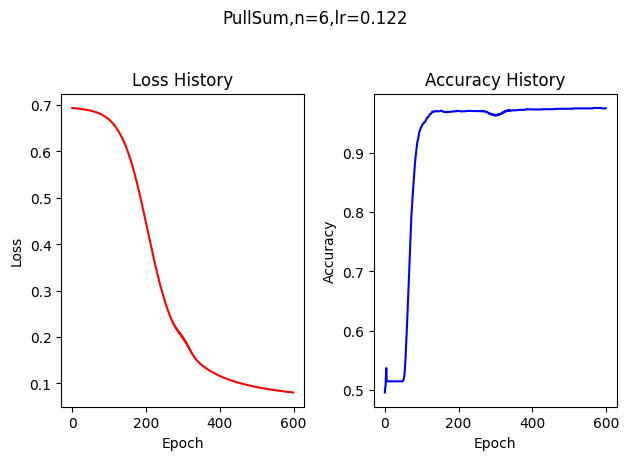

In [41]:
l,a=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.122/n))

Training Progress: 100%|██████████| 600/600 [01:12<00:00,  8.27it/s, accuracy=97.5397973951%, epoch=600, loss=0.0726816716]


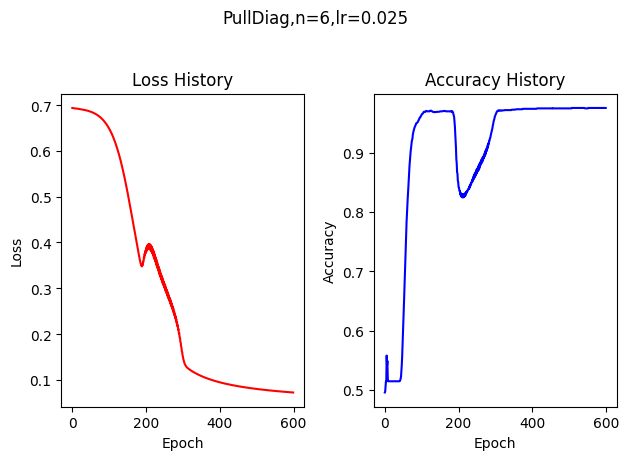

In [60]:
L1,A1=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=0.025)

Training Progress: 100%|██████████| 600/600 [01:13<00:00,  8.17it/s, accuracy=97.4674384949%, epoch=600, loss=0.0814518022]


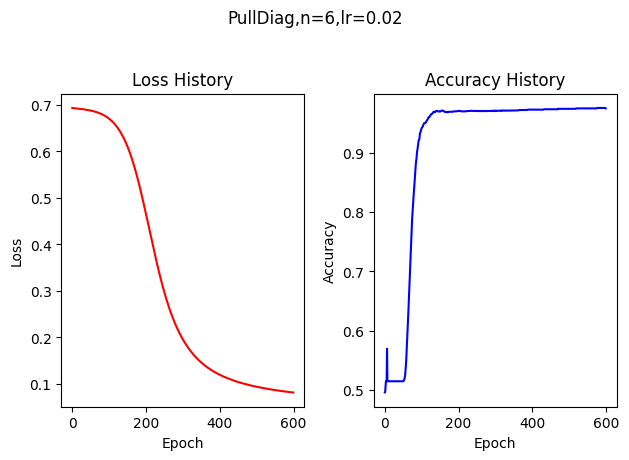

In [48]:
L2,A2=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=2e-2)

Training Progress: 100%|██████████| 600/600 [01:14<00:00,  8.09it/s, accuracy=97.5397973951%, epoch=600, loss=0.0640664753]


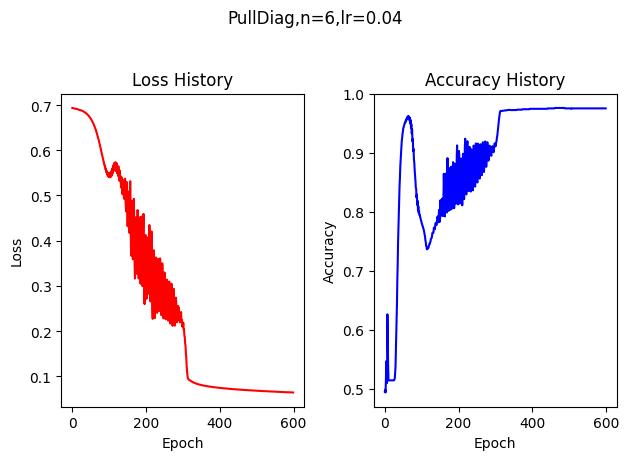

In [52]:
L3,A3=train_PullDiag(n=n,d=d,A=A,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=4e-2)

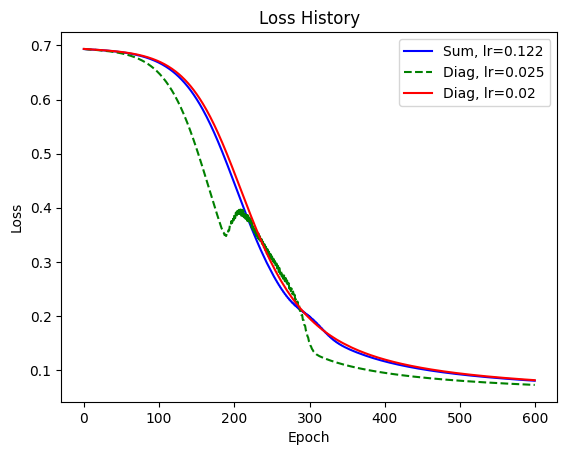

In [63]:
#plt.plot(L3, color='g',linestyle='-',label='Diag, lr=0.04')
plt.plot(l, color='b',linestyle='-',label='Sum, lr=0.122')
plt.plot(L1, color='g',linestyle='--',label='Diag, lr=0.025')
plt.plot(L2, color='r',linestyle='-',label='Diag, lr=0.02')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend() 
plt.show()